In [1]:
# import keras
# from keras.datasets import cifar10
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Concatenate
# from keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import regularizers

In [3]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 25
l = 40
num_filter = 12
compression = 0.5
dropout_rate = 0.2

In [4]:
# Load CIFAR10 Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# convert to one hot encoing 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
import numpy as np
x_tr=X_train.astype('float')/255

In [9]:
x_tr[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
x_te=X_test.astype('float')/255

In [11]:
x_te[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [13]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

In [14]:
#datagen.fit(x_tr_16)

In [15]:
# Dense Block
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate,name='Dropout'+str(block)+str(_))(Conv2D_3_3)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False,kernel_regularizer=regularizers.l2(0.0003) ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [17]:
num_filter = 36
dropout_rate = 0
l = 12
input = layers.Input(shape=(img_height, img_width, channel,),name='input_layer')
First_Conv2D = layers.Conv2D(num_filter, (3,3), use_bias=False ,padding='same',name='first_conv',kernel_regularizer=regularizers.l2(0.0003))(input)
block=1
First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)
block=2
Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)
block=3
Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)
block=4
Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

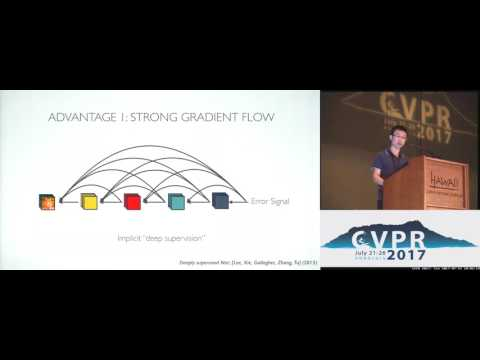

In [18]:
#https://arxiv.org/pdf/1608.06993.pdf
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo(id='-W6y8xnd--U', width=600)

In [19]:
model= Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 first_conv (Conv2D)            (None, 32, 32, 36)   972         ['input_layer[0][0]']            
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 36)  144         ['first_conv[0][0]']             
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 36)   0           ['batch_normalization[0][0]']

In [20]:
print(len(model.layers))

211


In [21]:
datagen.fit(x_tr)

In [22]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.01),
              metrics=['accuracy'])

In [27]:
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto')
tensorboard=tf.keras.callbacks.TensorBoard(
    log_dir='logs/DenseNet',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch')
def lr_update(epoch):
  lr=0.01
  if epoch>=25 and epoch<50 :
    lr=0.005
  elif epoch>=50:
    lr=0.001  
  return lr  
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lr_update)

In [24]:
!rm -rf logs
!rm -rf model_save

In [25]:
len(x_tr)//128

390

In [28]:
model.fit(datagen.flow(x_tr,y_train,batch_size=128),
         validation_data=(x_te,y_test),verbose=1,
         steps_per_epoch=len(x_tr)//128, epochs=75,callbacks=[checkpoint,tensorboard,lr_scheduler])

Epoch 1/75
390/390 [==============================] - 121s 259ms/step - loss: 1.9557 - accuracy: 0.3195 - val_loss: 1.8309 - val_accuracy: 0.3568 - lr: 0.0100
Epoch 2/75
390/390 [==============================] - 96s 245ms/step - loss: 1.5054 - accuracy: 0.4641 - val_loss: 1.5265 - val_accuracy: 0.4800 - lr: 0.0100
Epoch 3/75
390/390 [==============================] - 96s 245ms/step - loss: 1.2712 - accuracy: 0.5581 - val_loss: 1.4437 - val_accuracy: 0.5198 - lr: 0.0100
Epoch 4/75
390/390 [==============================] - 95s 244ms/step - loss: 1.1275 - accuracy: 0.6110 - val_loss: 1.8800 - val_accuracy: 0.4484 - lr: 0.0100
Epoch 5/75
390/390 [==============================] - 96s 245ms/step - loss: 1.0189 - accuracy: 0.6571 - val_loss: 1.5745 - val_accuracy: 0.5377 - lr: 0.0100
Epoch 6/75
390/390 [==============================] - 95s 244ms/step - loss: 0.9298 - accuracy: 0.6919 - val_loss: 1.3092 - val_accuracy: 0.5975 - lr: 0.0100
Epoch 7/75
390/390 [==============================]

KeyboardInterrupt: ignored

In [29]:
# Test the model
score = model.evaluate(x_te, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.3144 - accuracy: 0.9126
Test loss: 0.314426064491272
Test accuracy: 0.9125999808311462


In [32]:
# Save the trained weights in to .h5 format
model.save_weights("/content/drive/MyDrive/Kaggle/DNST_model58.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
